## Import Libraries

In [182]:
import nltk
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.collocations import BigramCollocationFinder,TrigramCollocationFinder,QuadgramCollocationFinder
from nltk.metrics import BigramAssocMeasures,TrigramAssocMeasures,QuadgramAssocMeasures
from nltk.util import ngrams
from nltk.text import Text
from nltk.corpus import stopwords
from nltk.draw.dispersion import dispersion_plot
from textblob import TextBlob
import PyPDF2
import textract
import ssl
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import networkx as nx
import squarify

## Read PDF

In [10]:
# creating a pdf reader object
reader = PyPDF2.PdfReader('Neural Networks and Deep Learning Michael Nielsen.pdf')

# print the number of pages in pdf file
print(len(reader.pages))
print('\n')

# print the text of the first page
print(reader.pages[0].extract_text())

224


Neural Networks and Deep Learning
Michael Nielsen
The original online book can be found at
http://neuralnetworksanddeeplearning.com


In [43]:
# Downloading required NLTK resources

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt') # for tokenization
nltk.download('stopwords') # for removing stopwords

[nltk_data] Downloading package punkt to /Users/chris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/chris/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [83]:
def pdf_to_text(pdf_file):
    """Convert a PDF file to text."""
    pdf = PyPDF2.PdfReader(pdf_file)
    text = ""
    for page in range(len(pdf.pages)):
        text += pdf.pages[page].extract_text()
    return text

text = pdf_to_text('Neural Networks and Deep Learning Michael Nielsen.pdf')

#text = textract.process('Neural Networks and Deep Learning Michael Nielsen.pdf')

# Tokenizing the text into words
tokens = word_tokenize(str(text))

# Tokenizing the text into sentences
sentences = sent_tokenize(str(text))

In [84]:
# Remove stopwords and create 'filtered_tokens' variable

stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

In [167]:
# Calculating word frequencies
word_freq = FreqDist(filtered_tokens)

# Get most common words
common_words = word_freq.most_common(50)

# Print common words to manually identify themes
print(common_words)

[(',', 6031), ('.', 5498), ('’', 2058), ('(', 1599), (')', 1599), (':', 726), ('network', 599), ('neural', 455), ('networks', 450), ('The', 445), ('I', 420), ('learning', 408), ('function', 399), ('@', 384), ("''", 368), ('training', 362), ('output', 357), ('layer', 349), ('=', 334), ('In', 328), ('neurons', 317), ('cost', 313), ('data', 313), ('?', 306), ('>', 304), ('use', 300), ('[', 277), (']', 277), ('gradient', 271), ('using', 255), ('neuron', 251), ('hidden', 243), ('We', 234), ('weights', 231), ('way', 226), ('input', 226), ('This', 216), ('problem', 210), ('1', 209), ('many', 188), ('``', 188), ('used', 182), ('layers', 182), ('deep', 180), ('It', 174), ('But', 172), ('And', 167), ('That', 165), ('much', 162), ('set', 158)]


In [136]:
# Finding bigrams in the text
bigram_measures = BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_words(filtered_tokens)
bigram_finder.apply_freq_filter(3)  # Only bigrams that appear 3+ times
bigrams = bigram_finder.nbest(bigram_measures.pmi, 100)

display(bigrams)

trigram_measures = TrigramAssocMeasures()
trigram_finder = TrigramCollocationFinder.from_words(filtered_tokens)
trigram_finder.apply_freq_filter(3)  # Only trigrams that appear 3+ times
trigrams = trigram_finder.nbest(trigram_measures.pmi, 100)

display(trigrams)

quadgram_measures = QuadgramAssocMeasures()
quadgram_finder = QuadgramCollocationFinder.from_words(filtered_tokens)
quadgram_finder.apply_freq_filter(3)  # Only quadgrams that appear 3+ times
quadgrams = quadgram_finder.nbest(quadgram_measures.pmi, 100)

display(quadgrams)

# Generating N-grams (bigrams, trigrams, and four_grams)
bigrams_list = list(ngrams(filtered_tokens, 2))
trigrams_list = list(ngrams(filtered_tokens, 3))
quadgrams_list = list(ngrams(filtered_tokens, 4))

[('Cire¸', 'san'),
 ('Patrick', 'Haffner'),
 ('Rob', 'Fergus'),
 ('Street', 'View'),
 ('aL\x002', 'p.'),
 ('b0', 'l=bl\x00\x11'),
 ('back-', 'propagation'),
 ('molecular', 'biology'),
 ('sharply', 'peaked'),
 ('wo', "n't"),
 ('ad', 'hoc'),
 ('glial', 'cells'),
 ('super-special', 'weapon'),
 ('1\x00\x11\x15', 'n\x8b'),
 ('Chris', 'Olah'),
 ('Jürgen', 'Schmidhuber'),
 ('Xavier', 'Glorot'),
 ('drag', 'mouse'),
 ('vice', 'versa'),
 ('w0', 'k=wk\x00\x11'),
 ('Third', '-party'),
 ('public', 'transit'),
 ('cross-', 'entropy'),
 ('11', 'xOutput'),
 ('2nX', 'ww2'),
 ('<', '1=4'),
 ('Genevieve', 'Orr'),
 ('James', 'Bergstra'),
 ('boyfriend', 'girlfriend'),
 ('l2_norm_squared/num_training_batches', 'grads'),
 ('short-term', 'memory'),
 ('wL', 'jk=1'),
 ('normalized', 'Gaussians'),
 ('square', 'root'),
 ('Alex', 'Krizhevsky'),
 ('adversarial', 'negatives'),
 ('translation', 'invariance'),
 ('Klaus-Robert', 'Müller'),
 ('Orr', 'Klaus-Robert'),
 ('Léon', 'Bottou'),
 ('convention', 'wo'),
 ('xyOutput

[('convention', 'wo', "n't"),
 ('Genevieve', 'Orr', 'Klaus-Robert'),
 ('jk=1', 'nX', 'xaL\x001'),
 ('Orr', 'Klaus-Robert', 'Müller'),
 ('wL', 'jk=1', 'nX'),
 ('Third', '-party', 'libraries'),
 ('brain', 'molecular', 'biology'),
 ('-by-layer', 'lists', 'numpy'),
 ('lists', 'numpy', 'arrays'),
 ('11', 'xOutput', 'top'),
 ('short-term', 'memory', 'units'),
 ('0101', 'xyOutputs1', 'x=0.4'),
 ('wl', 'jk\x01wl', 'jk'),
 ('Handwriting', 'recognition', 'revisited'),
 ('!', 'b0', 'l=bl\x00\x11'),
 ('nX', 'xaL\x001', 'k'),
 ('natural', 'language', 'processing'),
 ('import', 'numpy', 'np'),
 ('Libraries', '#', 'Standard'),
 ('Convolutional', 'Neural', 'Networks'),
 ('Classiﬁcation', 'Deep', 'Convolutional'),
 ('wo', "n't", 'set'),
 ('!', 'w0', 'k=wk\x00\x11'),
 ('3\x023local', 'receptive', 'ﬁelds'),
 ('variable', 'l', 'loop'),
 ('negative', 'indices', 'lists'),
 ('#', 'Third', '-party'),
 ('renumbering', '#', 'scheme'),
 ('eye', 'top', 'left'),
 ('*', 'l2_norm_squared/num_training_batches', 'grad

[('Genevieve', 'Orr', 'Klaus-Robert', 'Müller'),
 ('wL', 'jk=1', 'nX', 'xaL\x001'),
 ('-by-layer', 'lists', 'numpy', 'arrays'),
 ('jk=1', 'nX', 'xaL\x001', 'k'),
 ('view', 'brain', 'molecular', 'biology'),
 ('Third', '-party', 'libraries', 'import'),
 ('convention', 'wo', "n't", 'set'),
 ('wk', '!', 'w0', 'k=wk\x00\x11'),
 ('l2_norm_squared/num_training_batches', 'grads', '=', 'T.grad'),
 ('Classiﬁcation', 'Deep', 'Convolutional', 'Neural'),
 ("'s", 'renumbering', '#', 'scheme'),
 ('-party', 'libraries', 'import', 'numpy'),
 ('libraries', 'import', 'numpy', 'np'),
 ('param', '-eta', '*', 'grad'),
 ('#', 'Third', '-party', 'libraries'),
 ('Libraries', '#', 'Standard', 'library'),
 ('lmbda', '*', 'l2_norm_squared/num_training_batches', 'grads'),
 ('Deep', 'Convolutional', 'Neural', 'Networks'),
 ('k+mini_batch_size', ']', 'kin', 'xrange'),
 ('n', '@', 'aL\x002', 'p.'),
 ('Note', 'variable', 'l', 'loop'),
 ('self.n_in', '=', 'n_in', 'self.n_out'),
 ('@', 'wL', 'jk=1', 'nX'),
 ('11', 'xOut

In [112]:
# Sentiment analysis using TextBlob
blob = TextBlob(str(text))
sentiment = blob.sentiment

display(sentiment)

Sentiment(polarity=0.08533448371217275, subjectivity=0.4379473466410676)

In [123]:
# Preparing data for visualization (Word Cloud, Word Tree, Phrase Net)

word_freq_list = word_freq.most_common(50)
bigrams_freq = FreqDist(bigrams_list).most_common(50)
trigrams_freq = FreqDist(trigrams_list).most_common(50)
quadgrams_freq = FreqDist(quadgrams_list).most_common(50)

In [124]:
# Creating DataFrames for bigram, trigram, and quadgram frequencies for visualization

bigrams_df = pd.DataFrame(bigrams_freq, columns=["Bigram", "Frequency"])
trigrams_df = pd.DataFrame(trigrams_freq, columns=["Trigram", "Frequency"])
quadgrams_df = pd.DataFrame(quadgrams_freq, columns=["Quadgram", "Frequency"])
word_freq_df = pd.DataFrame(word_freq_list, columns=["Word", "Frequency"])

display(bigrams_df.head())
display(trigrams_df.head())
display(quadgrams_df.head())
display(word_freq_df)

,Bigram,Frequency
0,"(., .)",1209
1,"(,, ’)",440
2,"(., The)",346
3,"(., In)",257
4,"(neural, networks)",246


,Trigram,Frequency
0,"(., ., .)",1108
1,"('', '', '')",97
2,"(>, >, >)",95
3,"((, z, ))",90
4,"(., It, ’)",83


,Quadgram,Frequency
0,"(., ., ., .)",1027
1,"(., Of, course, ,)",60
2,"(:, '', '', '')",47
3,"(., In, particular, ,)",45
4,"(), :, '', '')",45


,Word,Frequency
0,",",6031
1,.,5498
2,’,2058
3,(,1599
4,),1599
5,:,726
6,network,599
7,neural,455
8,networks,450
9,The,445


In [125]:
# Outputting some basic analyses
word_freq_list[:10], bigrams[:10], sentiment, bigrams_df.head()

([(',', 6031),
  ('.', 5498),
  ('’', 2058),
  ('(', 1599),
  (')', 1599),
  (':', 726),
  ('network', 599),
  ('neural', 455),
  ('networks', 450),
  ('The', 445)],
 [('Cire¸', 'san'),
  ('Patrick', 'Haffner'),
  ('Rob', 'Fergus'),
  ('Street', 'View'),
  ('aL\x002', 'p.'),
  ('b0', 'l=bl\x00\x11'),
  ('back-', 'propagation'),
  ('molecular', 'biology'),
  ('sharply', 'peaked'),
  ('wo', "n't")],
 Sentiment(polarity=0.08533448371217275, subjectivity=0.4379473466410676),
                Bigram  Frequency
 0              (., .)       1209
 1              (,, ’)        440
 2            (., The)        346
 3             (., In)        257
 4  (neural, networks)        246)

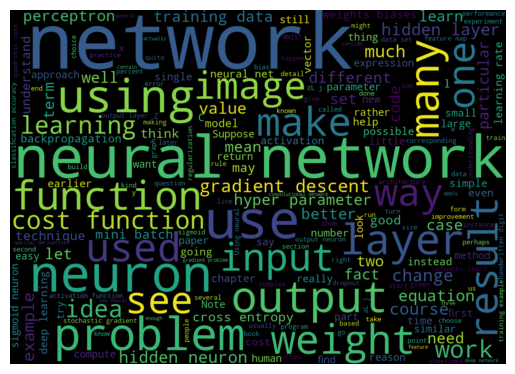

In [129]:
# Create wordcloud with filtered tokens

wordcloud = WordCloud(width=1400, height=1000).generate(' '.join(filtered_tokens))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

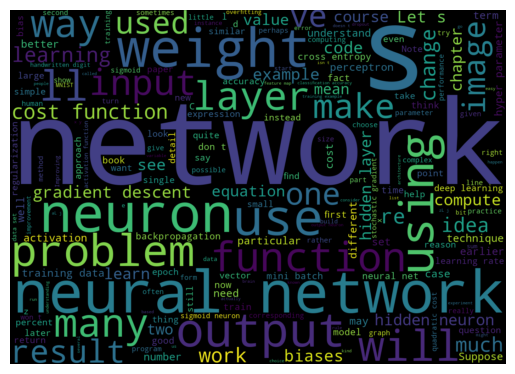

In [166]:
# Create wordcloud of sentences with sentence tokens

wordcloud = WordCloud(width=1400, height=1000).generate(' '.join(sentences))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [92]:
# Create an NLTK text object

nltk_text = Text(tokens)

In [93]:
# Conduct concordance analysis for 'learning'ArithmeticError

nltk_text.concordance('learning', lines=25)

Displaying 25 of 422 matches:
Neural Networks and Deep Learning Michael Nielsen The original onlin
. . . . . . . . . . . . . . 12 1.5 Learning with gradient descent . . . . . . 
. . . . . . . . 24 1.7 Toward deep learning . . . . . . . . . . . . . . . . . 
 . 163 5.4 Other obstacles to deep learning . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . 164 6 Deep learning 167 6.1 Introducing convolutional 
he problem at hand . Automatically learning from data sounds promising . Howev
as the discovery of techniques for learning in so-called deep neural networks 
e techniques are now known as deep learning . They ’ ve been developed further
oday deep neural networks and deep learning achieve outstanding performance on
cluding modern techniques for deep learning . After working through the book y
that uses neural networks and deep learning to solve complex pattern recogniti
on to use neural networks and deep learning to attack problems of your own dev
ciples of neural networks and de

<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

<Axes: title={'center': 'Lexical Dispersion Plot'}, xlabel='Word Offset'>

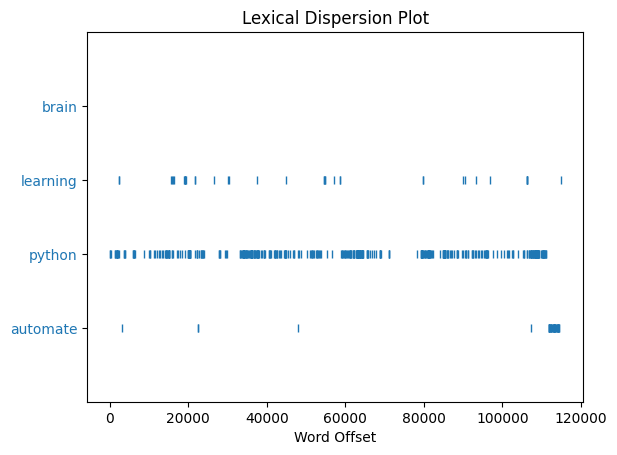

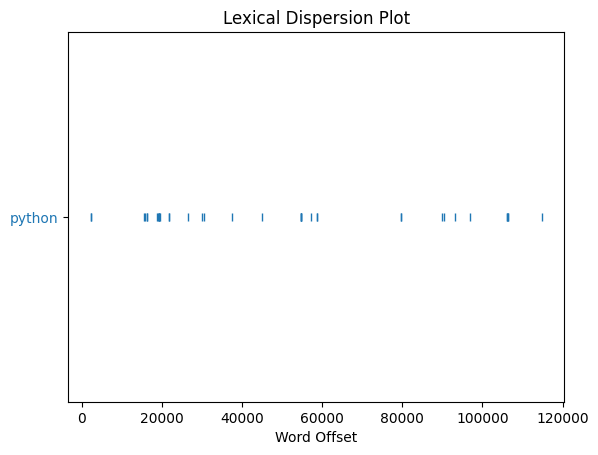

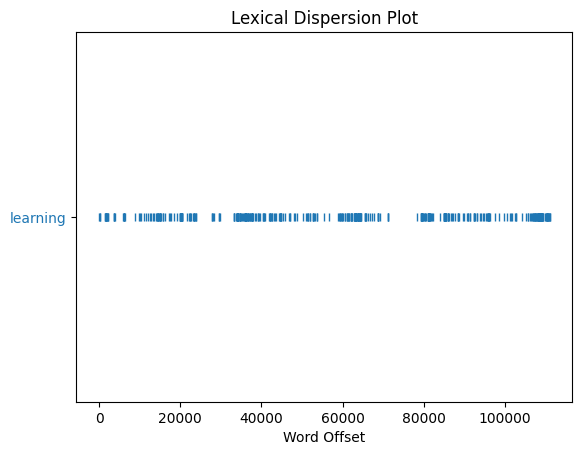

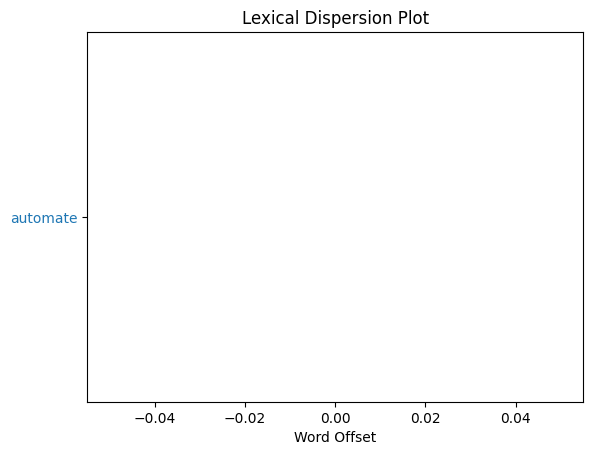

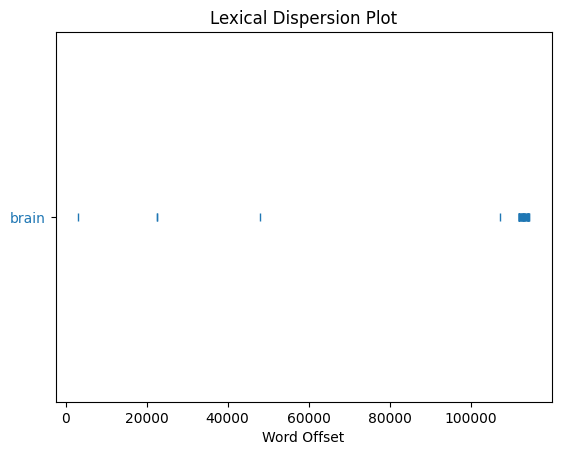

In [130]:
# Plot word dispersion across the book for the words 'learning','automate','python', and 'brain'

display(dispersion_plot(tokens,words=['automate','python','learning','brain'],ignore_case=True));

display(dispersion_plot(tokens,words=['python'],ignore_case=True));

display(dispersion_plot(tokens,words=['learning'],ignore_case=True));

display(dispersion_plot(tokens,words=['automate'],ignore_case=True));

display(dispersion_plot(tokens,words=['brain'],ignore_case=True));

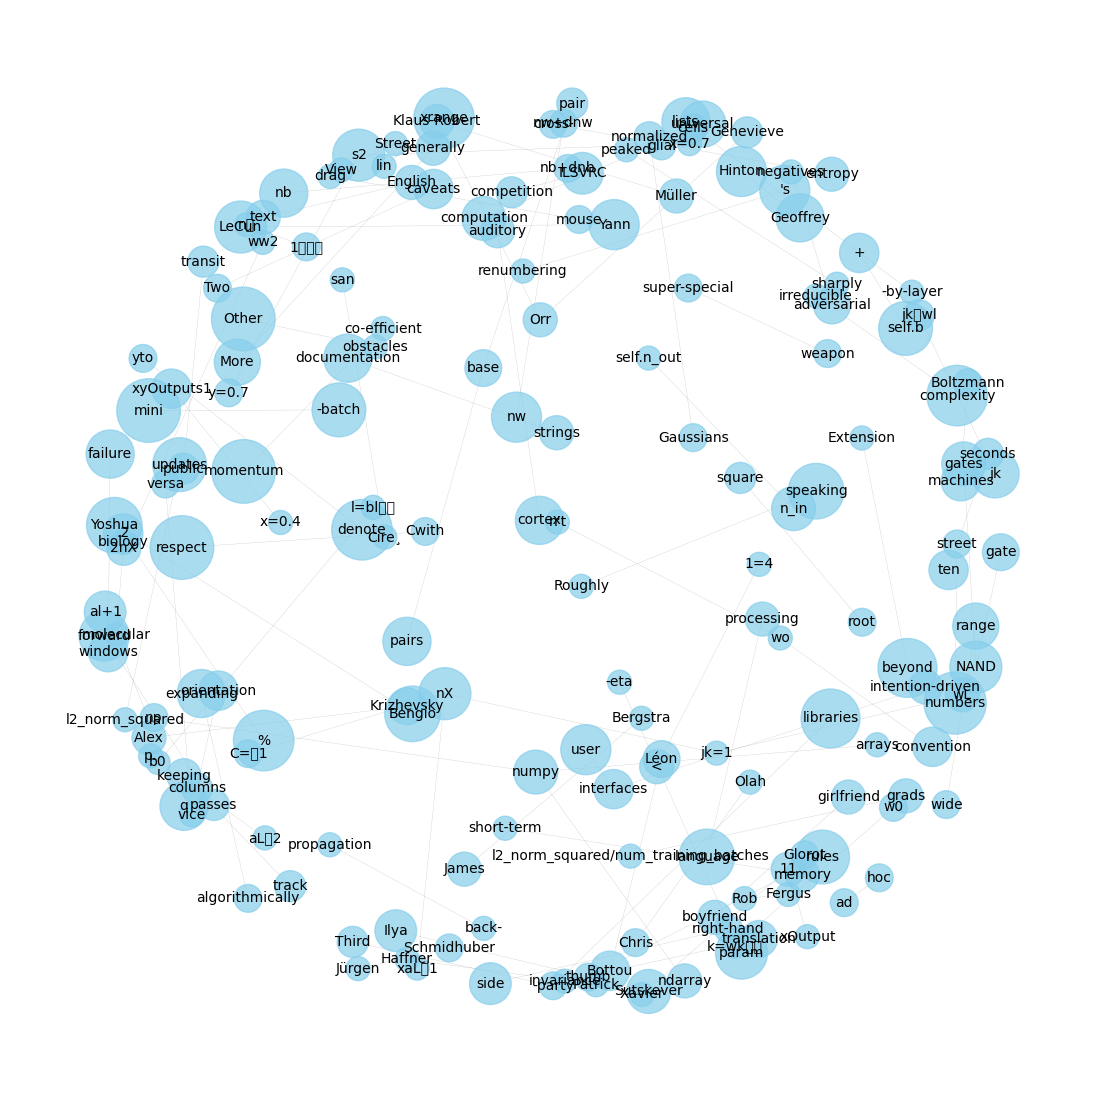

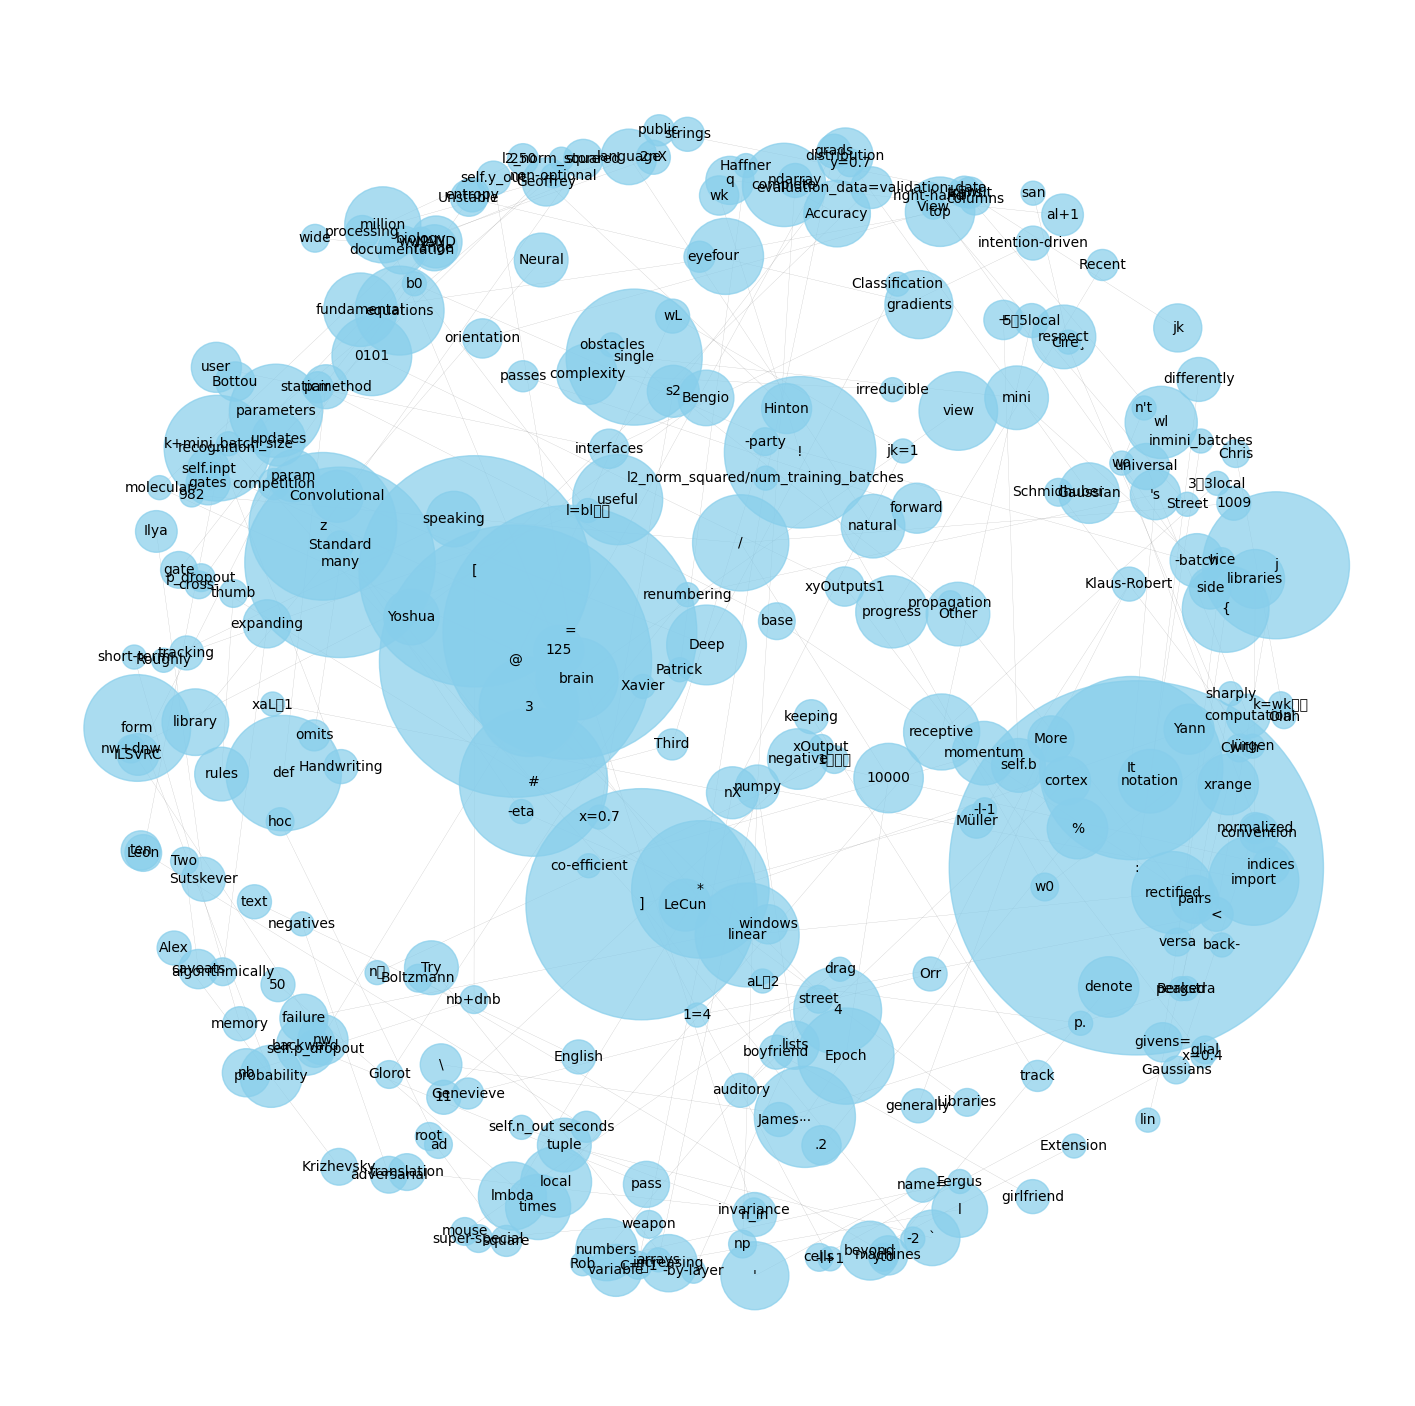

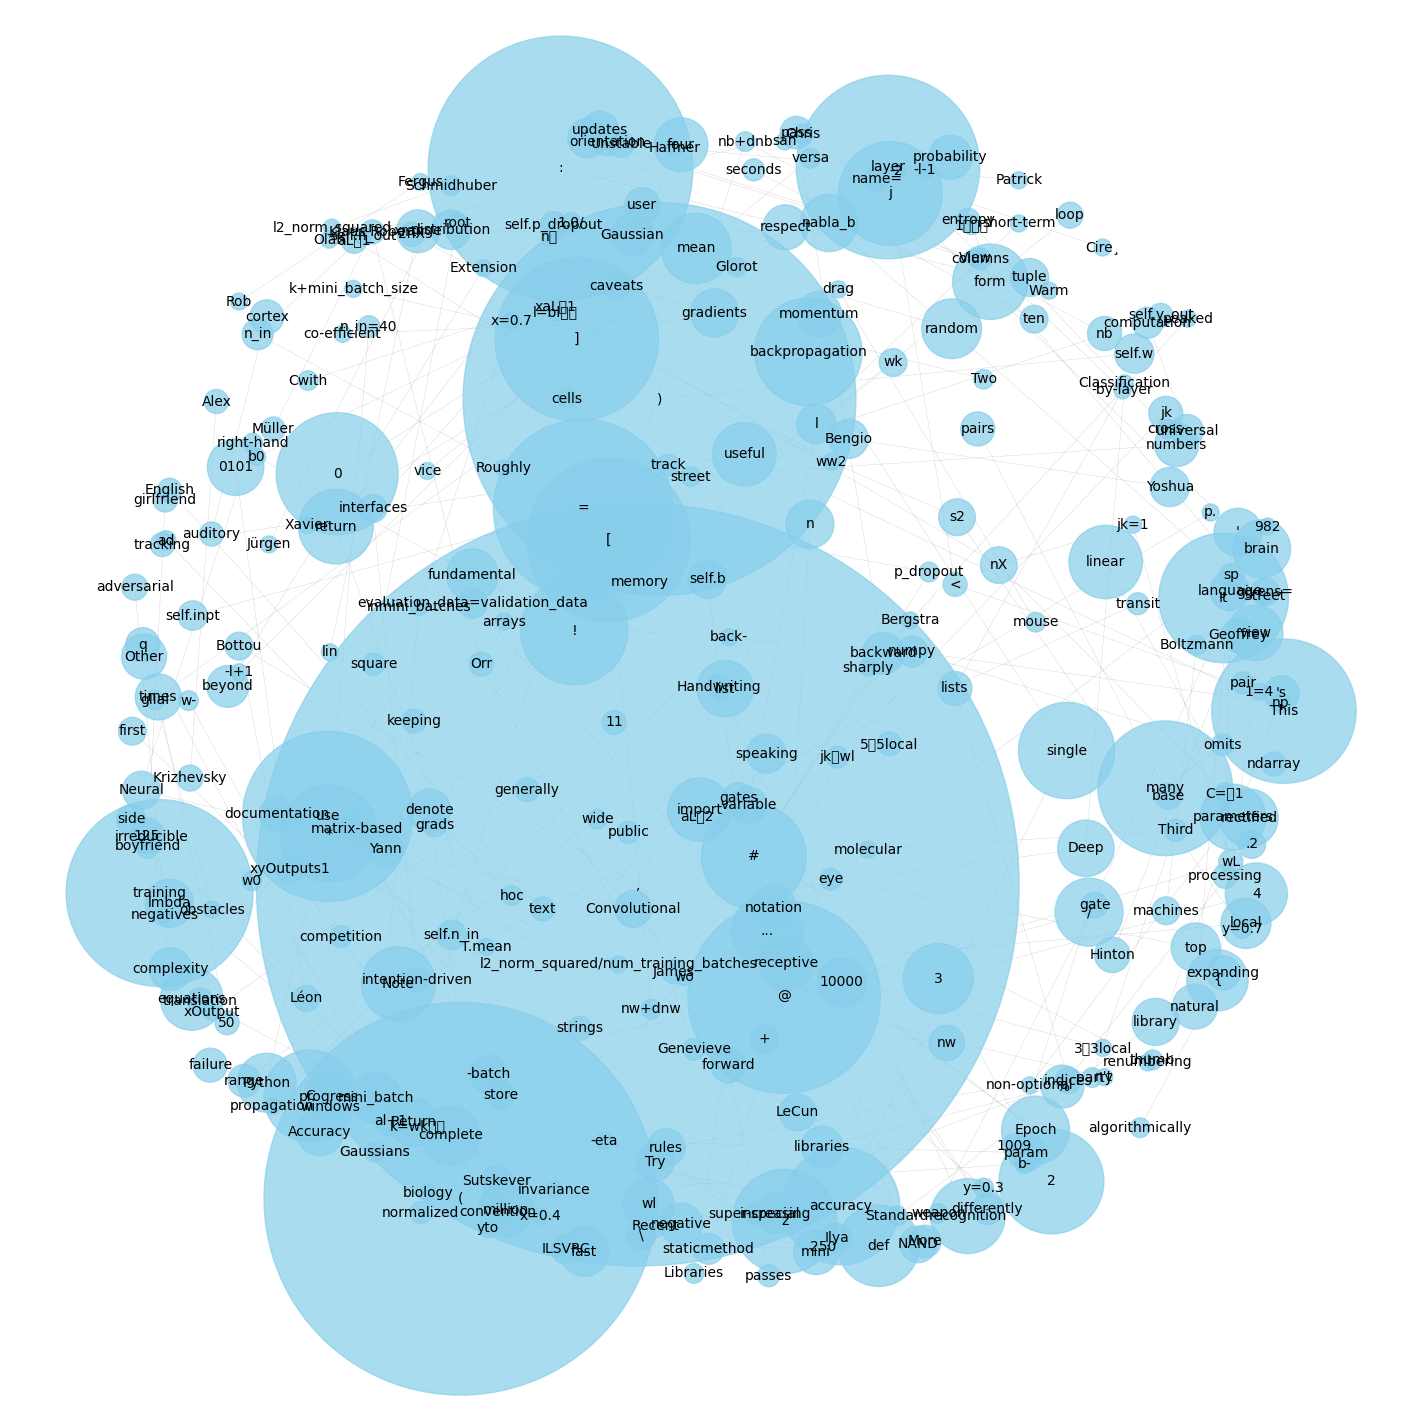

In [164]:
# Plot network diagrams for the top bigrams, trigrams, and quadgrams

bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)
quadgram_freq = Counter(quadgrams)

G = nx.Graph()


for bigram, freq in bigram_freq.items():
    G.add_edge(bigram[0], bigram[1], weight=freq)  # Add an edge between the two words in the bigram

# Calculating node sizes
node_sizes = [word_freq[word] * 100 for word in G.nodes()]  # Scale factor of 100

plt.figure(figsize=(14, 14)) 
pos = nx.spring_layout(G, k=0.5)  # k controls the distance between nodes

#nx.draw(G, pos, with_labels=True,
#        node_color='skyblue', edge_color='gray',
 #       font_size=10, font_weight='bold')

# Drawing nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)

# Drawing edges with weights
edges = nx.draw_networkx_edges(G, pos, edge_color='gray', width=[G[u][v]['weight']/5 for u,v in G.edges()], alpha=0.5)

# Labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Removing axis for better aesthetics
plt.axis('off')

plt.show()


# Plot trigram network diagram

for trigram, freq in trigram_freq.items():
    G.add_edge(trigram[0], trigram[1], weight=freq)  # Add an edge between the two words in the bigram

# Calculating node sizes
node_sizes = [word_freq[word] * 100 for word in G.nodes()]  # Scale factor of 100

plt.figure(figsize=(18, 18)) 
pos = nx.spring_layout(G, k=0.5)  # k controls the distance between nodes

#nx.draw(G, pos, with_labels=True,
#        node_color='skyblue', edge_color='gray',
 #       font_size=10, font_weight='bold')

# Drawing nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)

# Drawing edges with weights
edges = nx.draw_networkx_edges(G, pos, edge_color='gray', width=[G[u][v]['weight']/5 for u,v in G.edges()], alpha=0.5)

# Labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Removing axis for better aesthetics
plt.axis('off')

plt.show()


# Plot quadgram network diagram

for quadgram, freq in quadgram_freq.items():
    G.add_edge(quadgram[0], quadgram[1], weight=freq)  # Add an edge between the two words in the bigram

# Calculating node sizes
node_sizes = [word_freq[word] * 50 for word in G.nodes()]  # Scale factor of 100

plt.figure(figsize=(18, 18)) 
pos = nx.spring_layout(G, k=0.5)  # k controls the distance between nodes

#nx.draw(G, pos, with_labels=True,
 #       node_color='skyblue', edge_color='gray',
  #      font_size=10, font_weight='bold')

# Drawing nodes
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)

# Drawing edges with weights
edges = nx.draw_networkx_edges(G, pos, edge_color='gray', width=[G[u][v]['weight']/5 for u,v in G.edges()], alpha=0.5)

# Labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Removing axis for better aesthetics
plt.axis('off')

plt.show()

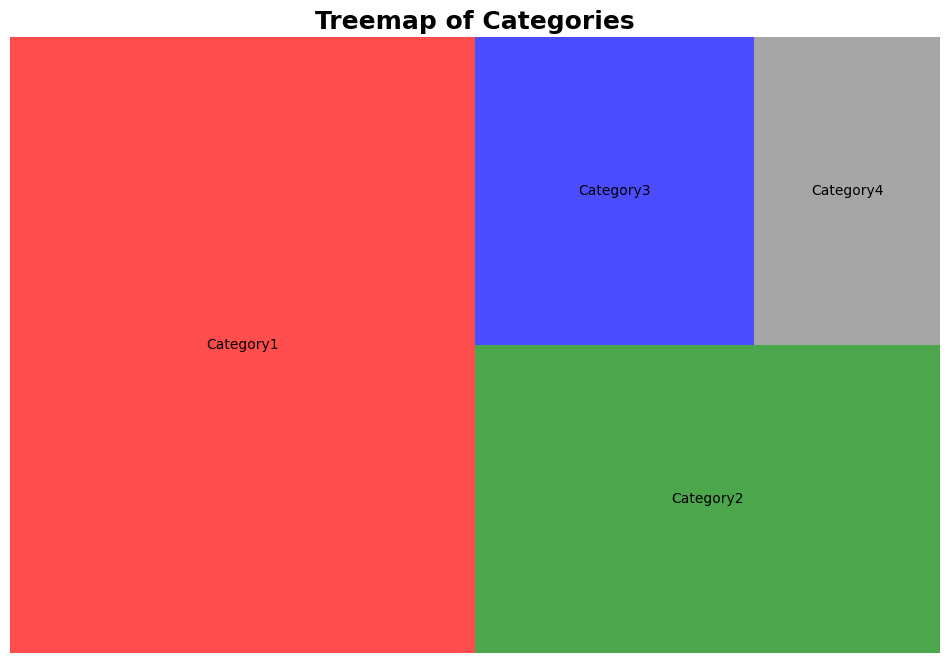

In [174]:
# Plot treemap to show proportions of the book's categories/themes

categories = ['Category1', 'Category2', 'Category3', 'Category4']
sizes = [50, 25, 15, 10]  # Replace these with actual data
colors = ['red', 'green', 'blue', 'grey']

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=categories, color=colors, alpha=0.7)

plt.title('Treemap of Categories',fontweight='bold',fontsize=18)
plt.axis('off')  # Disable the axis
plt.show()

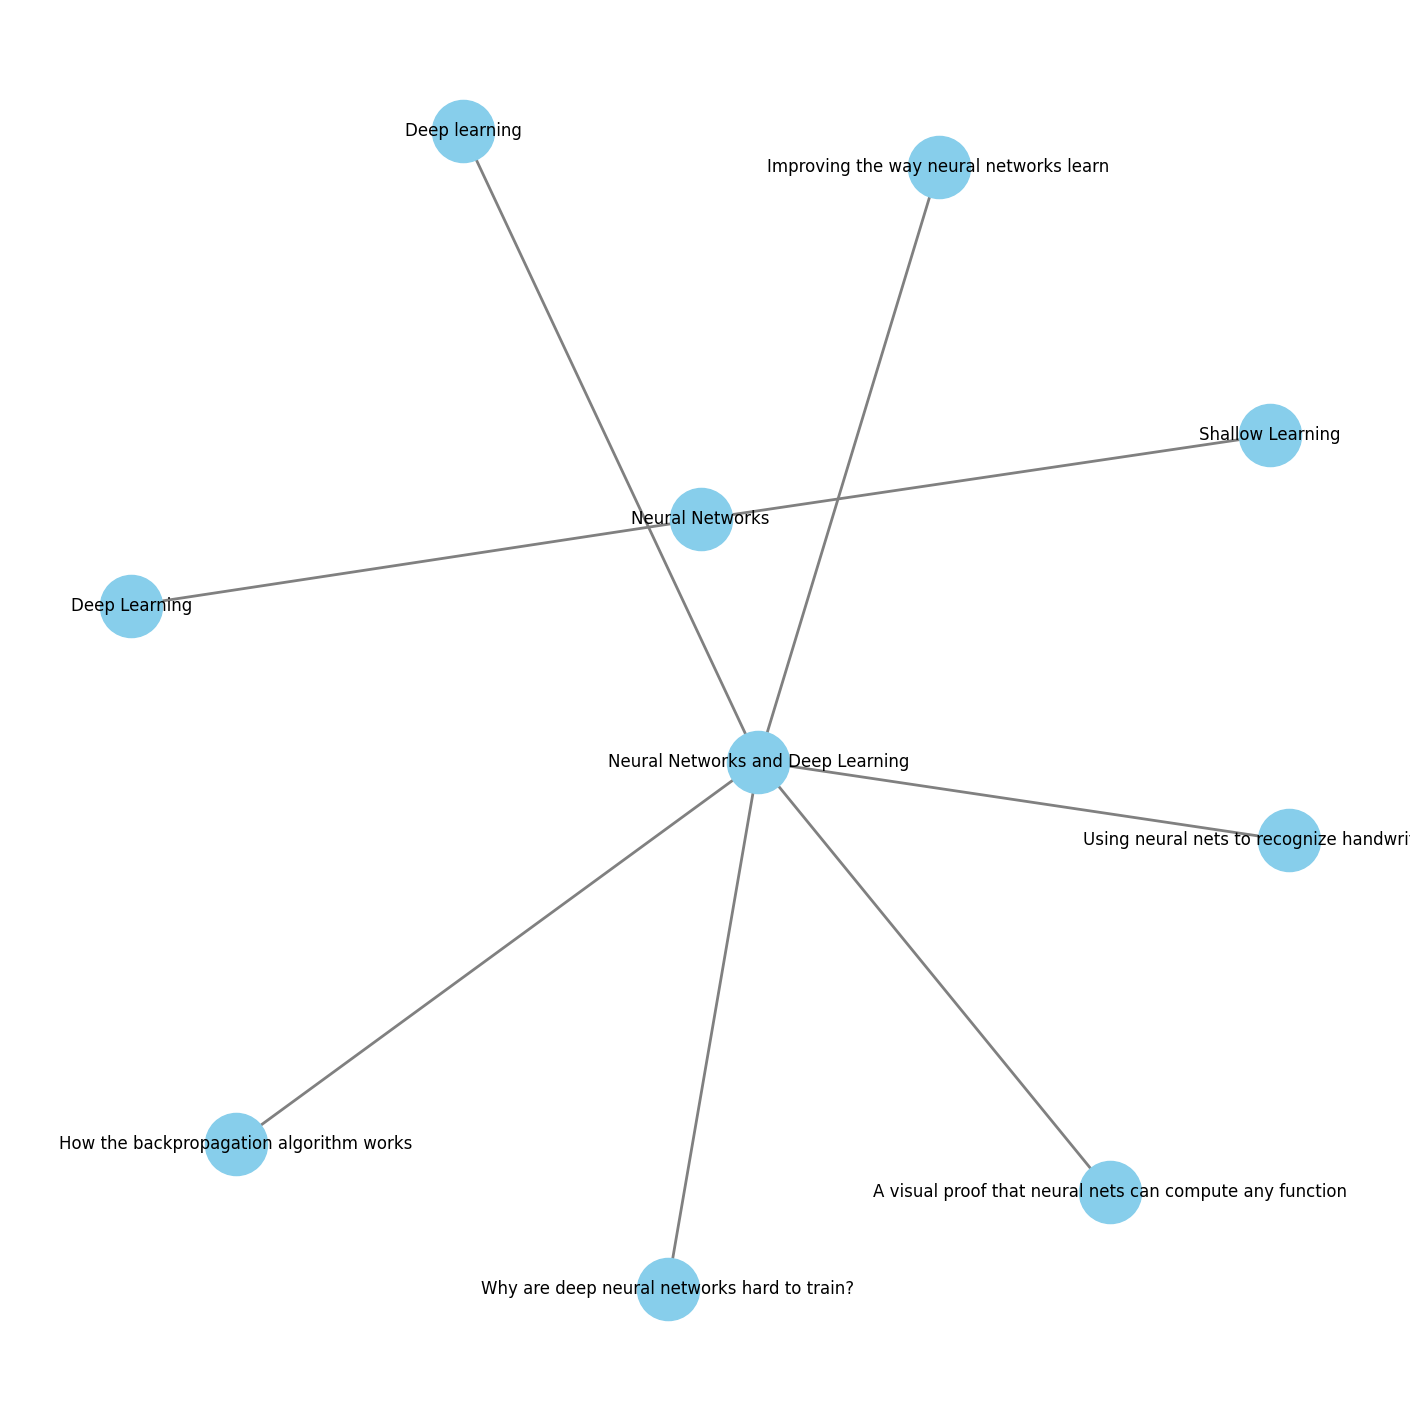

In [179]:
# Plot mind map for the book (Software like XMind or FreeMind are likely better suited for this task)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
G.add_node("Neural Networks and Deep Learning")
G.add_nodes_from(["Using neural nets to recognize handwritten digits", "How the backpropagation algorithm works", "Improving the way neural networks learn", "A visual proof that neural nets can compute any function", "Why are deep neural networks hard to train?", "Deep learning"])
G.add_edges_from([("Neural Networks and Deep Learning", chapter) for chapter in ["Using neural nets to recognize handwritten digits", "How the backpropagation algorithm works", "Improving the way neural networks learn", "A visual proof that neural nets can compute any function", "Why are deep neural networks hard to train?", "Deep learning"]])
G.add_nodes_from(["Shallow Learning", "Deep Learning"])
G.add_edges_from([("Neural Networks", "Shallow Learning"), ("Neural Networks", "Deep Learning")])

# Specify the layout for nodes
pos = nx.spring_layout(G)

plt.figure(figsize=(14, 14))

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', width=2, font_size=12, arrows=False)

# Show the plot
plt.show()

In [183]:
# Convert the text data into numerical vectors using TF-IDF

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

In [184]:
# Perform K-means cluster analysis

num_clusters = 5  # Adjust the number of clusters
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [185]:
# Analyze the clusters

books = { 'sentence': sentences, 'cluster': clusters }
frame = pd.DataFrame(books, index=[clusters], columns=['sentence', 'cluster'])

# Viewing the sentences in each cluster
print(frame[frame['cluster'] == 0])  # Repeat for other clusters

                                             sentence  cluster
0            12\n1.5 Learning with gradient descent .        0
0   118iiContents\n3.6.1 Variations on stochast...        0
0           151\n5.1 The vanishing gradient problem .        0
0   154\n5.2 What’s causing the vanishing gradient...        0
0   Learning with gradient descent15\nimages, o...        0
..                                                ...      ...
0   Recall that the usual\nmanifestation of this p...        0
0   If the network runs for a long time that can\n...        0
0   The units\nwere introduced by Hochreiter and S...        0
0   Why is it that stochastic gradient descent wor...        0
0   And there is paper\nafter paper leveraging the...        0

[216 rows x 2 columns]


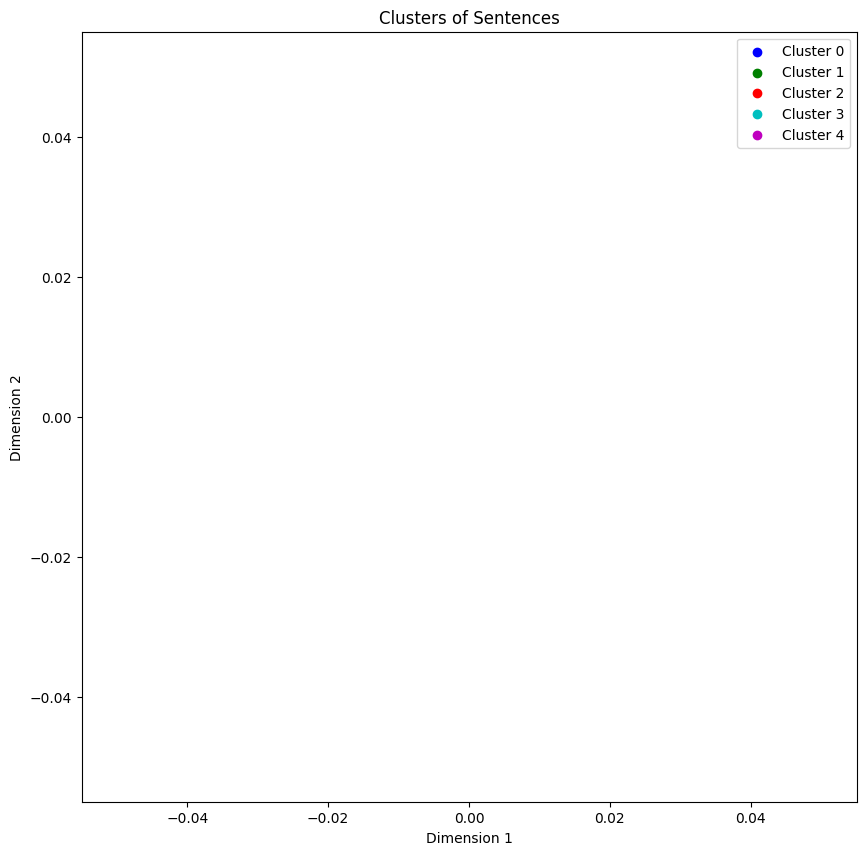

In [186]:
# Plot cluster analysis diagram

# Reduce dimensionality for visualization
tsne_model = TSNE(n_components=2, random_state=42)
low_dim_data = tsne_model.fit_transform(tfidf_matrix.toarray())

x_vals = low_dim_data[:, 0]
y_vals = low_dim_data[:, 1]

# Plotting
plt.figure(figsize=(10, 10))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i in range(num_clusters):
    plt.scatter(x_vals[clusters == i], y_vals[clusters == i], c=colors[i], label=f'Cluster {i}')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Clusters of Sentences')
plt.legend()
plt.show()